# Emissions de polluants dans l'air 

In [126]:
import sys
sys.path.append('../../')
from config.settings import settings
import dtale as dt
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split, GridSearchCV

In [127]:
DATASETS_BASE = settings.MODULES_TO_DATASETS_PATH

## F1 AIR

In [128]:
df1_1 = pd.read_csv(DATASETS_BASE + settings.DATA_EU_AIR_F1_1)
df1_1.head()

,countryName,pollutant,reportingYear,emissions
0,Austria,Carbon monoxide (CO),2007,163261000.0
1,Austria,Copper and compounds (as Cu),2007,380.0
2,Austria,Zinc and compounds (as Zn),2007,18820.0
3,Austria,Chromium and compounds (as Cr),2008,389.0
4,Austria,Nitrogen oxides (NOX),2009,19103000.0


In [129]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryName    11541 non-null  object 
 1   pollutant      11541 non-null  object 
 2   reportingYear  11541 non-null  int64  
 3   emissions      11541 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 360.8+ KB


## F2 AIR

In [130]:
df1_2 = pd.read_csv(DATASETS_BASE + settings.DATA_EU_AIR_F1_2)
df1_2.head()

,countryName,reportingYear,targetRelease,EPRTRSectorCode,eprtrSectorName,pollutant,emissions
0,Austria,2007,AIR,1.0,Energy sector,Carbon dioxide (CO2),2.870000e+09
1,Austria,2007,AIR,1.0,Energy sector,Nitrogen oxides (NOX),3.050000e+06
2,Austria,2007,AIR,1.0,Energy sector,Particulate matter (PM10),9.250000e+04
3,Austria,2007,AIR,1.0,Energy sector,Sulphur oxides (SOX),3.230000e+06
4,Austria,2007,AIR,1.0,Energy sector,Carbon dioxide (CO2),8.454000e+09


In [131]:
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62104 entries, 0 to 62103
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countryName      62104 non-null  object 
 1   reportingYear    62104 non-null  int64  
 2   targetRelease    62104 non-null  object 
 3   EPRTRSectorCode  61957 non-null  float64
 4   eprtrSectorName  61957 non-null  object 
 5   pollutant        62104 non-null  object 
 6   emissions        62104 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.3+ MB


In [132]:
print("targetRelease :", df1_2.targetRelease.unique())
print("EPRTRSectorCode :", df1_2.EPRTRSectorCode.unique())
print("eprtrSectorName :", df1_2.eprtrSectorName.unique())

targetRelease : ['AIR']
EPRTRSectorCode : [ 1.  2.  3.  4.  5.  6.  8.  9.  7. nan]
eprtrSectorName : ['Energy sector' 'Production and processing of metals' 'Mineral industry'
 'Chemical industry' 'Waste and wastewater management'
 'Paper and wood production and processing'
 'Animal and vegetable products from the food and beverage sector'
 'Other activities' 'Intensive livestock production and aquaculture' nan]


## F3 AIR

In [133]:
df1_3 = pd.read_csv(DATASETS_BASE + settings.DATA_EU_AIR_F1_3)
df1_3.head()

,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,targetRelease,reportingYear,pollutant,emissions
0,Austria,1.0,Energy sector,1(a),Mineral oil and gas refineries,AIR,2007,Carbon dioxide (CO2),2.870000e+09
1,Austria,1.0,Energy sector,1(a),Mineral oil and gas refineries,AIR,2007,Nitrogen oxides (NOX),3.050000e+06
2,Austria,1.0,Energy sector,1(a),Mineral oil and gas refineries,AIR,2007,Particulate matter (PM10),9.250000e+04
3,Austria,1.0,Energy sector,1(a),Mineral oil and gas refineries,AIR,2007,Sulphur oxides (SOX),3.230000e+06
4,Austria,1.0,Energy sector,1(c),Thermal power stations and other combustion in...,AIR,2007,Carbon dioxide (CO2),8.454000e+09


In [134]:
df1_3.EPRTRAnnexIMainActivityLabel.unique()

array(['Mineral oil and gas refineries',
       'Thermal power stations and other combustion installations',
       'Installations for the production of pig iron or steel (primary or secondary melting) including continuous casting',
       'Ferrous metal foundries with a production capacity of 20 tonnes per day',
       'Installations for the production and/or smelting of non-ferrous metals. Note to reporters, use Level 3 activity e.g. 2(e)(i), in preference to 2(e). Level 2 activity class (i.e. 2(e)) only to be used where Level 3 is not available.',
       'Installations for surface treatment of metals and plastic materials using an electrolytic or chemical process',
       'Installations for the production of cement clinker in rotary kilns, lime in rotary kilns, cement or lime in other furnaces. Note to reporters, use Level 3 activity e.g. 3(c)(i), in preference to 3(c). Level 2 activity class (i.e. 3(c)) only to be used where Level 3 is not available.',
       'Installations for the

In [135]:
df1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62104 entries, 0 to 62103
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   countryName                   62104 non-null  object 
 1   EPRTRSectorCode               61957 non-null  float64
 2   eprtrSectorName               61957 non-null  object 
 3   EPRTRAnnexIMainActivityCode   61957 non-null  object 
 4   EPRTRAnnexIMainActivityLabel  61957 non-null  object 
 5   targetRelease                 62104 non-null  object 
 6   reportingYear                 62104 non-null  int64  
 7   pollutant                     62104 non-null  object 
 8   emissions                     62104 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 4.3+ MB


## F4 AIR

In [136]:
df1_4 = pd.read_csv(DATASETS_BASE + settings.DATA_EU_AIR_F1_4, low_memory=False)
df1_4.head()

,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,facilityNameConfidentialityReason,Longitude,Latitude,addressConfidentialityReason,City,targetRelease,pollutant,emissions,reportingYear,releasesConfidentialityReason
0,Austria,4.0,Chemical industry,4(d),Chemical installations for the production on a...,AT.CAED/9008390392737.FACILITY,Nufarm GmbH & CO KG,NaN,14.336056,48.290943,NaN,Linz,AIR,"1,2-dichloroethane (DCE-1,2)",3300.0,2007,NaN
1,Austria,9.0,Other activities,9(c),Installations for the surface treatment of sub...,AT.CAED/9008390396414.FACILITY,MAGNA STEYR Fahrzeugtechnik AG&Co KG,NaN,15.477778,47.019170,NaN,"Graz,07.Bez.:Liebenau",AIR,Non-methane volatile organic compounds (NMVOC),170000.0,2007,NaN
2,Austria,6.0,Paper and wood production and processing,6(b),Industrial plants for the production of paper ...,AT.CAED/9008390397176.FACILITY,Fritz EGGER GmbH & Co. OG,NaN,15.691833,48.259556,NaN,Unterradlberg,AIR,Carbon dioxide (CO2),228000000.0,2007,NaN
3,Austria,6.0,Paper and wood production and processing,6(b),Industrial plants for the production of paper ...,AT.CAED/9008390397176.FACILITY,Fritz EGGER GmbH & Co. OG,NaN,15.691833,48.259556,NaN,Unterradlberg,AIR,Nitrogen oxides (NOX),311000.0,2007,NaN
4,Austria,3.0,Mineral industry,3(c),Installations for the production of cement cli...,AT.CAED/9008390397220.FACILITY,voestalpine Stahl GmbH,NaN,14.159778,47.807083,NaN,Klaus an der Pyhrnbahn,AIR,Carbon dioxide (CO2),329000000.0,2007,NaN


In [137]:
df1_4.info()

# 324555 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324555 entries, 0 to 324554
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   countryName                        324555 non-null  object 
 1   EPRTRSectorCode                    323540 non-null  float64
 2   eprtrSectorName                    323540 non-null  object 
 3   EPRTRAnnexIMainActivityCode        323540 non-null  object 
 4   EPRTRAnnexIMainActivityLabel       323540 non-null  object 
 5   FacilityInspireID                  324555 non-null  object 
 6   facilityName                       324159 non-null  object 
 7   facilityNameConfidentialityReason  1790 non-null    object 
 8   Longitude                          324555 non-null  float64
 9   Latitude                           324555 non-null  float64
 10  addressConfidentialityReason       1050 non-null    object 
 11  City                               3243

In [138]:
df1_4[~df1_4.facilityNameConfidentialityReason.isna()][["facilityName", "facilityNameConfidentialityReason"]]

,facilityName,facilityNameConfidentialityReason
3528,Confidential,Article4(2)(f)
3529,Confidential,Article4(2)(f)
3530,Confidential,Article4(2)(f)
3562,Confidential,Article4(2)(f)
3652,Confidential,Article4(2)(f)
...,...,...
319413,Confidential,Article4(2)(d)
319414,Confidential,Article4(2)(d)
321877,Confidential,Article4(2)(d)
321878,Confidential,Article4(2)(d)


In [139]:
df1_4.targetRelease.unique()

array(['AIR'], dtype=object)

In [140]:
print(len(df1_4.EPRTRSectorCode.unique()))
print(len(df1_4.eprtrSectorName.unique()))

10
10


In [141]:
df1_4.FacilityInspireID.value_counts()

FacilityInspireID
NL.RIVM/000023301.FACILITY                                                                          356
FR.CAED/7656.FACILITY                                                                               330
FR.CAED/10845.FACILITY                                                                              327
UK.CAED/NRW170281.FACILITY                                                                          300
https://data.ied_registry.omgeving.vlaanderen.be/id/productionfacility//BE.VL.000000605.FACILITY    285
                                                                                                   ... 
IT.CAED/470142014.FACILITY                                                                            1
IT.CAED/460402054.FACILITY                                                                            1
IT.CAED/460102030.FACILITY                                                                            1
IT.CAED/410432001.FACILITY                    

## COPY DF

In [142]:
df = df1_4.copy(deep=True)

Nous supprimons du dataset, les colonnes ayant trop de valeurs null comme addressConfidentialityReason, facilityNameConfidentialityReason et releasesConfidentialityReason.

Les colonnes EPRTRSectorCode et EPRTRAnnexIMainActivityCode sont également retirées puisqu'elles ont la même signification que eprtrSectorName et EPRTRAnnexIMainActivityLabel.

Enfin, targetRelease n'a qu'une seule valeur.

In [143]:
df = df.drop(columns=[
    "targetRelease", 
    "facilityNameConfidentialityReason", 
    "EPRTRSectorCode", 
    "EPRTRAnnexIMainActivityCode",
    "addressConfidentialityReason",
    "releasesConfidentialityReason"
])

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324555 entries, 0 to 324554
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   countryName                   324555 non-null  object 
 1   eprtrSectorName               323540 non-null  object 
 2   EPRTRAnnexIMainActivityLabel  323540 non-null  object 
 3   FacilityInspireID             324555 non-null  object 
 4   facilityName                  324159 non-null  object 
 5   Longitude                     324555 non-null  float64
 6   Latitude                      324555 non-null  float64
 7   City                          324322 non-null  object 
 8   pollutant                     324555 non-null  object 
 9   emissions                     324555 non-null  float64
 10  reportingYear                 324555 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 27.2+ MB


In [145]:
len(df.facilityName.unique())

29223

In [146]:
df.isnull().sum()

countryName                        0
eprtrSectorName                 1015
EPRTRAnnexIMainActivityLabel    1015
FacilityInspireID                  0
facilityName                     396
Longitude                          0
Latitude                           0
City                             233
pollutant                          0
emissions                          0
reportingYear                      0
dtype: int64

In [147]:
df.eprtrSectorName.value_counts()

eprtrSectorName
Intensive livestock production and aquaculture                     94249
Energy sector                                                      80205
Waste and wastewater management                                    36169
Mineral industry                                                   35637
Production and processing of metals                                27786
Chemical industry                                                  24134
Paper and wood production and processing                           13230
Animal and vegetable products from the food and beverage sector     6677
Other activities                                                    5453
Name: count, dtype: int64

## Confidential data

In [148]:
df_confidential = df[df.facilityName == "Confidential"]

In [149]:
df_confidential[["eprtrSectorName"]].value_counts()

eprtrSectorName                                                
Intensive livestock production and aquaculture                     983
Mineral industry                                                   380
Production and processing of metals                                160
Energy sector                                                       69
Animal and vegetable products from the food and beverage sector     66
Waste and wastewater management                                     56
Other activities                                                    40
Chemical industry                                                   29
Paper and wood production and processing                             7
Name: count, dtype: int64

## Visualisation

### GROUP BY POLLUTANT

In [150]:
group_by_pollutant = df.groupby("pollutant")["emissions"].agg(["sum", "mean", "median"]).sort_values(by=["sum"], ascending=False)
group_by_pollutant

,sum,mean,median
pollutant,,,
Carbon dioxide (CO2),2.691943e+13,8.263579e+08,3.090000e+08
Carbon dioxide (CO2) excluding biomass,4.074543e+12,6.797703e+08,1.760000e+08
Carbon monoxide (CO),4.703089e+10,5.785569e+06,1.130000e+06
Sulphur oxides (SOX),3.788767e+10,2.209194e+06,4.740000e+05
Nitrogen oxides (NOX),3.178179e+10,8.540737e+05,3.100000e+05
...,...,...,...
Asbestos,6.500000e+00,1.625000e+00,1.680000e+00
Chlordecone,4.230000e+00,4.230000e+00,4.230000e+00
Halogenated organic compounds (as AOX),7.000000e-02,7.000000e-02,7.000000e-02


In [151]:
", ".join(group_by_pollutant.index)

'Carbon dioxide (CO2), Carbon dioxide (CO2) excluding biomass, Carbon monoxide (CO), Sulphur oxides (SOX), Nitrogen oxides (NOX), Methane (CH4), Non-methane volatile organic compounds (NMVOC), Ammonia (NH3), Particulate matter (PM10), Nitrous oxide (N2O), Chlorine and inorganic compounds (as HCl), Perfluorocarbons (PFCs), Fluorine and inorganic compounds (as HF), Benzene, Dichloromethane (DCM), 1,2-dichloroethane (DCE-1,2), Hydro-fluorocarbons (HFCS), Zinc and compounds (as Zn), Vinyl chloride, Hydrochlorofluorocarbons (HCFCs), Tetrachloroethylene, Fluorides (as total F), Trichloroethylene (TRI), Lead and compounds (as Pb), Hydrogen cyanide (HCN), Nickel and compounds (as Ni), Trichloromethane, Naphthalene, Copper and compounds (as Cu), Chromium and compounds (as Cr), Toluene, Fine particulate matter (PM2.5), Polycyclic aromatic hydrocarbons (PAHs), Total organic carbon(as total C or COD/3) (TOC), Chlorofluorocarbons (CFCs), Tetrachloromethane (TCM), 1,1,1-trichloroethane (TCE-1,1,1), 

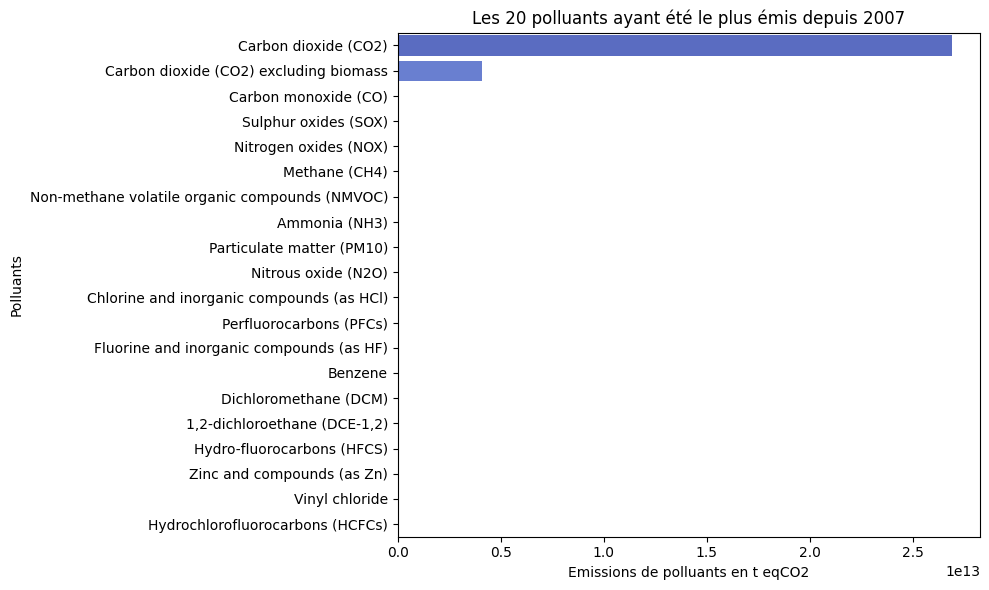

In [152]:
plt.figure(figsize=(10, 6))
sns.barplot(data=group_by_pollutant.head(20), x=group_by_pollutant["sum"].head(20), y=group_by_pollutant.index[:20], palette="coolwarm")
plt.title("Les 20 polluants ayant été le plus émis depuis 2007")
plt.xlabel("Emissions de polluants en t eqCO2")
plt.ylabel("Polluants")
plt.tight_layout()
plt.show()

Comparer la quantité totale émise de chacun de ces polluants ne nous fournit pas d'informations utiles, à l'exception du fait que le CO2 est le gaz le plus largement rejeté dans l'atmosphère depuis 2007.

L'idéal, serait de regarder l'évolution de l'émission de polluants au fil des années ou sinon, de corréler ce dataset avec des données comme le Potentiel de Réchauffement Global (PRG) afin d'étudier le degré de dangerosité de chacun de ces gaz à effet de serre (GES).

### GROUP BY YEAR

In [153]:
df.reportingYear.value_counts()

reportingYear
2007    23814
2008    23731
2010    22873
2009    22727
2011    22726
2012    22321
2013    22247
2014    22020
2015    21893
2017    21810
2018    21797
2016    21774
2019    20675
2020    17872
2021    16275
Name: count, dtype: int64

In [154]:
group_by_year = df.groupby(["reportingYear", "pollutant"])["emissions"]\
    .agg(["sum", "mean", "median"])\
    .sort_values(by=["sum"], ascending=False)
group_by_year

,,sum,mean,median
reportingYear,pollutant,,,
2007,Carbon dioxide (CO2),2.210293e+12,9.711303e+08,349000000.0
2008,Carbon dioxide (CO2),2.143508e+12,9.187777e+08,341000000.0
2010,Carbon dioxide (CO2),2.068745e+12,8.806920e+08,313000000.0
2009,Carbon dioxide (CO2),1.974517e+12,8.732936e+08,323000000.0
2011,Carbon dioxide (CO2),1.960841e+12,8.466499e+08,316000000.0
...,...,...,...,...
2021,CONFIDENTIAL,0.000000e+00,0.000000e+00,0.0
2020,CONFIDENTIAL,0.000000e+00,0.000000e+00,0.0
2012,CONFIDENTIAL,0.000000e+00,0.000000e+00,0.0


In [155]:
group_by_CO2 = group_by_year[group_by_year.index.get_level_values("pollutant").str.contains("CO2")]
group_by_CH4 = group_by_year[group_by_year.index.get_level_values("pollutant").str.contains("CH4")]
group_by_N2O = group_by_year[group_by_year.index.get_level_values("pollutant").str.contains("N2O")]
group_by_PFCs = group_by_year[group_by_year.index.get_level_values("pollutant").str.contains("PFCs")]
group_by_HFCS = group_by_year[group_by_year.index.get_level_values("pollutant").str.contains("HFCS")]
group_by_SF6 = group_by_year[group_by_year.index.get_level_values("pollutant").str.contains("SF6")]

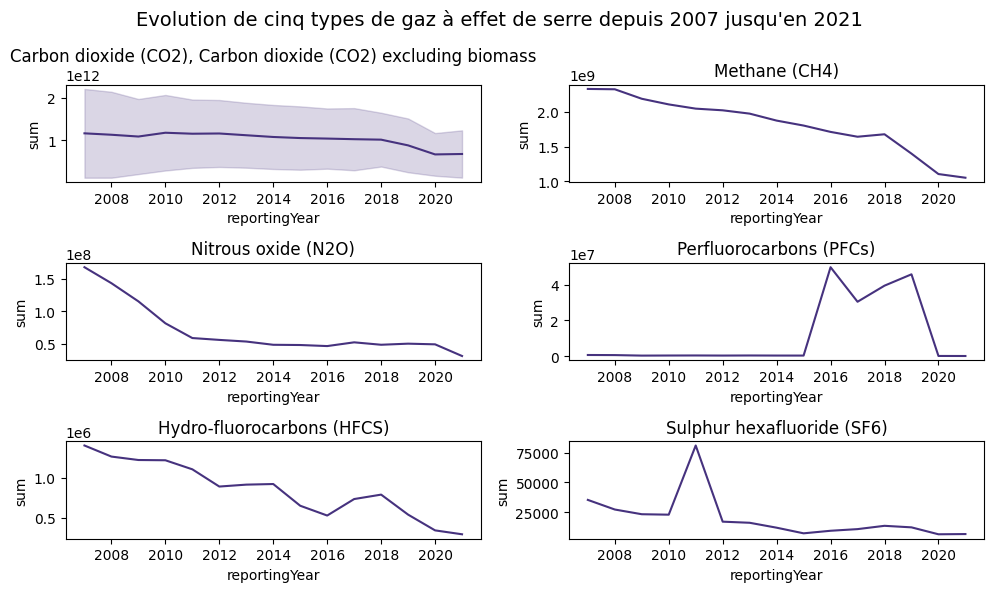

In [156]:
fig = plt.figure(1, figsize=(10, 6), tight_layout=True)

plt.suptitle("Evolution de cinq types de gaz à effet de serre depuis 2007 jusqu'en 2021", fontsize=14)

plt.subplot(321)
plt.title(", ".join(group_by_CO2.index.get_level_values("pollutant").unique()))
sns.lineplot(
    data=group_by_CO2,
    x=group_by_CO2.index.get_level_values("reportingYear"),
    y=group_by_CO2["sum"]
)

plt.subplot(322)
plt.title(", ".join(group_by_CH4.index.get_level_values("pollutant").unique()))
sns.lineplot(
    data=group_by_CH4,
    x=group_by_CH4.index.get_level_values("reportingYear"),
    y=group_by_CH4["sum"]
)

plt.subplot(323)
plt.title(", ".join(group_by_N2O.index.get_level_values("pollutant").unique()))
sns.lineplot(
    data=group_by_N2O,
    x=group_by_N2O.index.get_level_values("reportingYear"),
    y=group_by_N2O["sum"]
)

plt.subplot(324)
plt.title(", ".join(group_by_PFCs.index.get_level_values("pollutant").unique()))
sns.lineplot(
    data=group_by_PFCs,
    x=group_by_PFCs.index.get_level_values("reportingYear"),
    y=group_by_PFCs["sum"]
)

plt.subplot(325)
plt.title(", ".join(group_by_HFCS.index.get_level_values("pollutant").unique()))
sns.lineplot(
    data=group_by_HFCS,
    x=group_by_HFCS.index.get_level_values("reportingYear"),
    y=group_by_HFCS["sum"]
)

plt.subplot(326)
plt.title(", ".join(group_by_SF6.index.get_level_values("pollutant").unique()))
sns.lineplot(
    data=group_by_SF6,
    x=group_by_SF6.index.get_level_values("reportingYear"),
    y=group_by_SF6["sum"]
)

plt.show()

Nous avons étudié l'évolution de la quantité de cinq gaz à effet de serre les plus courants : le dioxyde de carbone (CO2), le méthane (CH4), l'oxyde nitreux (N2O), le tétrafluorure de carbone (CF4, PFC-14), le trifluorométhane (CHF3, HFC-23) et l'hexafluorure de soufre (SF6).^

Les différents graphiques montre une diminution globale de ces polluants.

### GROUP BY SECTOR

In [157]:
group_by_sector = df.groupby(["eprtrSectorName", "pollutant"])["emissions"].sum()
group_by_sector

eprtrSectorName                                                  pollutant                    
Animal and vegetable products from the food and beverage sector  Ammonia (NH3)                    1.278604e+07
                                                                 Arsenic and compounds (as As)    3.238000e+02
                                                                 Benzene                          5.705000e+04
                                                                 CONFIDENTIAL                     0.000000e+00
                                                                 Cadmium and compounds (as Cd)    4.104000e+02
                                                                                                      ...     
Waste and wastewater management                                  Trichloroethylene (TRI)          1.002520e+06
                                                                 Trichloromethane                 3.172400e+04
                 

In [158]:
group_confidential_by_sector = df_confidential.groupby(["eprtrSectorName", "pollutant"])["emissions"].sum()

In [159]:
group_confidential_by_sector

eprtrSectorName                                                  pollutant                       
Animal and vegetable products from the food and beverage sector  Ammonia (NH3)                       1.063000e+05
                                                                 Carbon dioxide (CO2)                3.763741e+09
                                                                 Chlorofluorocarbons (CFCs)          4.900000e+01
                                                                 Hydro-fluorocarbons (HFCS)          3.030700e+03
                                                                 Hydrochlorofluorocarbons (HCFCs)    3.980000e+02
                                                                                                         ...     
Waste and wastewater management                                  Chlorofluorocarbons (CFCs)          6.837480e+01
                                                                 Hydrochlorofluorocarbons (HCFCs)    9.0

### GROUP BY ACTIVITY

In [160]:
group_by_activity = df.groupby(["EPRTRAnnexIMainActivityLabel", "pollutant"])["emissions"].sum()
group_by_activity

EPRTRAnnexIMainActivityLabel                                                                                                                                                                                                                                    pollutant                    
Chemical installations for the production on an industrial scale of basic inorganic chemicals. Note to reporters, use Level 3 activity e.g. 4(b)(i), in preference to 4(b). Level 2 activity class (i.e. 4(b)) only to be used where Level 3 is not available.  1,2-dichloroethane (DCE-1,2)         7740.0
                                                                                                                                                                                                                                                                Ammonia (NH3)                    60351831.0
                                                                                                                  

In [161]:
group_by_business = df.groupby(["EPRTRAnnexIMainActivityLabel", "pollutant"])["emissions"].sum()
group_by_business

EPRTRAnnexIMainActivityLabel                                                                                                                                                                                                                                    pollutant                    
Chemical installations for the production on an industrial scale of basic inorganic chemicals. Note to reporters, use Level 3 activity e.g. 4(b)(i), in preference to 4(b). Level 2 activity class (i.e. 4(b)) only to be used where Level 3 is not available.  1,2-dichloroethane (DCE-1,2)         7740.0
                                                                                                                                                                                                                                                                Ammonia (NH3)                    60351831.0
                                                                                                                  

In [162]:
df.facilityName.value_counts()

facilityName
Confidential              1790
Enel Produzione S.p.A.     850
Versalis S.p.A.            405
Tata Steel IJmuiden BV     356
Aurubis AG                 330
                          ... 
SCEA DE KERLAOUENAN          1
SCEA NOVA LAND               1
SAS KERJEAN LA GARENNE       1
SCEA DES TROIS VALLEES       1
Dryfeholm Farm               1
Name: count, Length: 29222, dtype: int64

In [163]:
df

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,Longitude,Latitude,City,pollutant,emissions,reportingYear
0,Austria,Chemical industry,Chemical installations for the production on a...,AT.CAED/9008390392737.FACILITY,Nufarm GmbH & CO KG,14.336056,48.290943,Linz,"1,2-dichloroethane (DCE-1,2)",3300.0,2007
1,Austria,Other activities,Installations for the surface treatment of sub...,AT.CAED/9008390396414.FACILITY,MAGNA STEYR Fahrzeugtechnik AG&Co KG,15.477778,47.019170,"Graz,07.Bez.:Liebenau",Non-methane volatile organic compounds (NMVOC),170000.0,2007
2,Austria,Paper and wood production and processing,Industrial plants for the production of paper ...,AT.CAED/9008390397176.FACILITY,Fritz EGGER GmbH & Co. OG,15.691833,48.259556,Unterradlberg,Carbon dioxide (CO2),228000000.0,2007
3,Austria,Paper and wood production and processing,Industrial plants for the production of paper ...,AT.CAED/9008390397176.FACILITY,Fritz EGGER GmbH & Co. OG,15.691833,48.259556,Unterradlberg,Nitrogen oxides (NOX),311000.0,2007
4,Austria,Mineral industry,Installations for the production of cement cli...,AT.CAED/9008390397220.FACILITY,voestalpine Stahl GmbH,14.159778,47.807083,Klaus an der Pyhrnbahn,Carbon dioxide (CO2),329000000.0,2007
...,...,...,...,...,...,...,...,...,...,...,...
324550,United Kingdom,Animal and vegetable products from the food an...,Treatment and processing intended for the prod...,UK.SEPA/200002640.Facility,United Biscuits Glasgow,-4.183770,55.844670,Glasgow,Hydro-fluorocarbons (HFCS),330.0,2019
324551,United Kingdom,Waste and wastewater management,Installations for the incineration of non-haza...,UK.SEPA/200002651.Facility,Millerhill Recycling & Energy Recovery Centre,-3.085940,55.925070,"Millerhill, Dalkeith",Carbon dioxide (CO2),132000000.0,2019
324552,United Kingdom,Waste and wastewater management,Installations for the incineration of non-haza...,UK.SEPA/200002651.Facility,Millerhill Recycling & Energy Recovery Centre,-3.085940,55.925070,"Millerhill, Dalkeith",Nitrogen oxides (NOX),175000.0,2019
324553,United Kingdom,Intensive livestock production and aquaculture,Installations for the intensive rearing of pou...,UK.SEPA/200002676.Facility,"Elrig Farm, Port William, Newton Stewart",-4.604860,54.800200,"Port William, Newton Stewart",Ammonia (NH3),11500.0,2019


### MOST REPRESENTATIVE POLLUTANTS GROUPED BY SECTOR

In [164]:
companies_group_by_sector = df.groupby("eprtrSectorName")["FacilityInspireID"].nunique()

companies_group_by_sector

eprtrSectorName
Animal and vegetable products from the food and beverage sector      961
Chemical industry                                                   1500
Energy sector                                                       2486
Intensive livestock production and aquaculture                     14125
Mineral industry                                                    1913
Other activities                                                     799
Paper and wood production and processing                             505
Production and processing of metals                                 1515
Waste and wastewater management                                     3152
Name: FacilityInspireID, dtype: int64

In [165]:
pollutants_group_by_sector = df.groupby("eprtrSectorName")["pollutant"]

In [166]:
pollutants_group_by_sector.describe()

,count,unique,top,freq
eprtrSectorName,,,,
Animal and vegetable products from the food and beverage sector,6677,31,Hydro-fluorocarbons (HFCS),1175
Chemical industry,24134,57,Non-methane volatile organic compounds (NMVOC),3010
Energy sector,80205,53,Nitrogen oxides (NOX),15989
Intensive livestock production and aquaculture,94249,15,Ammonia (NH3),89905
Mineral industry,35637,41,Nitrogen oxides (NOX),8319
Other activities,5453,48,Non-methane volatile organic compounds (NMVOC),3601
Paper and wood production and processing,13230,39,Nitrogen oxides (NOX),3038
Production and processing of metals,27786,54,Zinc and compounds (as Zn),3121
Waste and wastewater management,36169,60,Methane (CH4),14908


In [167]:
emissions_of_pollutants_group_by_sector = df.groupby(["eprtrSectorName", "pollutant"])
emissions_of_pollutants_group_by_sector["emissions"].describe()

count   
eprtrSectorName                                    pollutant                              
Animal and vegetable products from the food and... Ammonia (NH3)                  365.0  \
                                                   Arsenic and compounds (as As)    5.0   
                                                   Benzene                         34.0   
                                                   CONFIDENTIAL                     1.0   
                                                   Cadmium and compounds (as Cd)   14.0   
...                                                                                 ...   
Waste and wastewater management                    Trichloroethylene (TRI)         13.0   
                                                   Trichloromethane                25.0   
                                                   Vinyl chloride                  17.0   
                                                   Xylenes                          1.0   
                                                   Zinc and compounds (as Zn)     326.0   

                                                                                          mean   
eprtrSectorName                                    pollutant                                     
Animal and vegetable products from the food and... Ammonia (NH3)                  35030.258904  \
                                                   Arsenic and compounds (as As)     64.760000   
                                                   Benzene                         1677.941176   
                                                   CONFIDENTIAL                       0.000000   
                                                   Cadmium and compounds (as Cd)     29.314286   
...                                                                                        ...   
Waste and wastewater management                    Trichloroethylene (TRI)        77116.923077   
                                                   Trichloromethane                1268.960000   
                                                   Vinyl chloride                 30858.588235   
                                                   Xylenes                         6040.000000   
                                                   Zinc and compounds (as Zn)       686.345804   

                                                                                           std   
eprtrSectorName                                    pollutant                                     
Animal and vegetable products from the food and... Ammonia (NH3)                  31687.304411  \
                                                   Arsenic and compounds (as As)     51.834622   
                                                   Benzene                          582.121405   
                                                   CONFIDENTIAL                            NaN   
                                                   Cadmium and compounds (as Cd)     20.191844   
...                                                                                        ...   
Waste and wastewater management                    Trichloroethylene (TRI)        79823.269726   
                                                   Trichloromethane                1029.192300   
                                                   Vinyl chloride                 34476.189775   
                                                   Xylenes                                 NaN   
                                                   Zinc and compounds (as Zn)       949.501854   

                                                                                     min   
eprtrSectorName                                    pollutant                               
Animal and vegetable products from the food and... Ammonia (NH3)                     0.0  \
                                                   Arsenic and compounds

In [168]:
pollutant_group_by_sector = df.groupby(["reportingYear", "eprtrSectorName", "pollutant"])["emissions"]\
    .agg(["sum", "mean", "median"])\
    .sort_values(by=["sum"], ascending=False)

In [169]:
pollutant_group_by_sector

,,,sum,mean,median
reportingYear,eprtrSectorName,pollutant,,,
2007,Energy sector,Carbon dioxide (CO2),1.562301e+12,1.397407e+09,527000000.0
2008,Energy sector,Carbon dioxide (CO2),1.508610e+12,1.328002e+09,518500000.0
2010,Energy sector,Carbon dioxide (CO2),1.476787e+12,1.283047e+09,447000000.0
2009,Energy sector,Carbon dioxide (CO2),1.446521e+12,1.282377e+09,474000000.0
2011,Energy sector,Carbon dioxide (CO2),1.371716e+12,1.251566e+09,467000000.0
...,...,...,...,...,...
2016,Intensive livestock production and aquaculture,CONFIDENTIAL,0.000000e+00,0.000000e+00,0.0
2018,Intensive livestock production and aquaculture,CONFIDENTIAL,0.000000e+00,0.000000e+00,0.0
2009,Intensive livestock production and aquaculture,CONFIDENTIAL,0.000000e+00,0.000000e+00,0.0


In [170]:
co2_data = pollutant_group_by_sector[pollutant_group_by_sector.index.get_level_values("pollutant") == "Carbon dioxide (CO2)"]
co2_data

,,,sum,mean,median
reportingYear,eprtrSectorName,pollutant,,,
2007,Energy sector,Carbon dioxide (CO2),1.562301e+12,1.397407e+09,527000000.0
2008,Energy sector,Carbon dioxide (CO2),1.508610e+12,1.328002e+09,518500000.0
2010,Energy sector,Carbon dioxide (CO2),1.476787e+12,1.283047e+09,447000000.0
2009,Energy sector,Carbon dioxide (CO2),1.446521e+12,1.282377e+09,474000000.0
2011,Energy sector,Carbon dioxide (CO2),1.371716e+12,1.251566e+09,467000000.0
...,...,...,...,...,...
2016,Intensive livestock production and aquaculture,Carbon dioxide (CO2),6.910000e+08,6.910000e+08,691000000.0
2018,Other activities,Carbon dioxide (CO2),6.721656e+08,9.602365e+07,25800000.0
2009,Other activities,Carbon dioxide (CO2),6.045000e+08,1.209000e+08,117000000.0


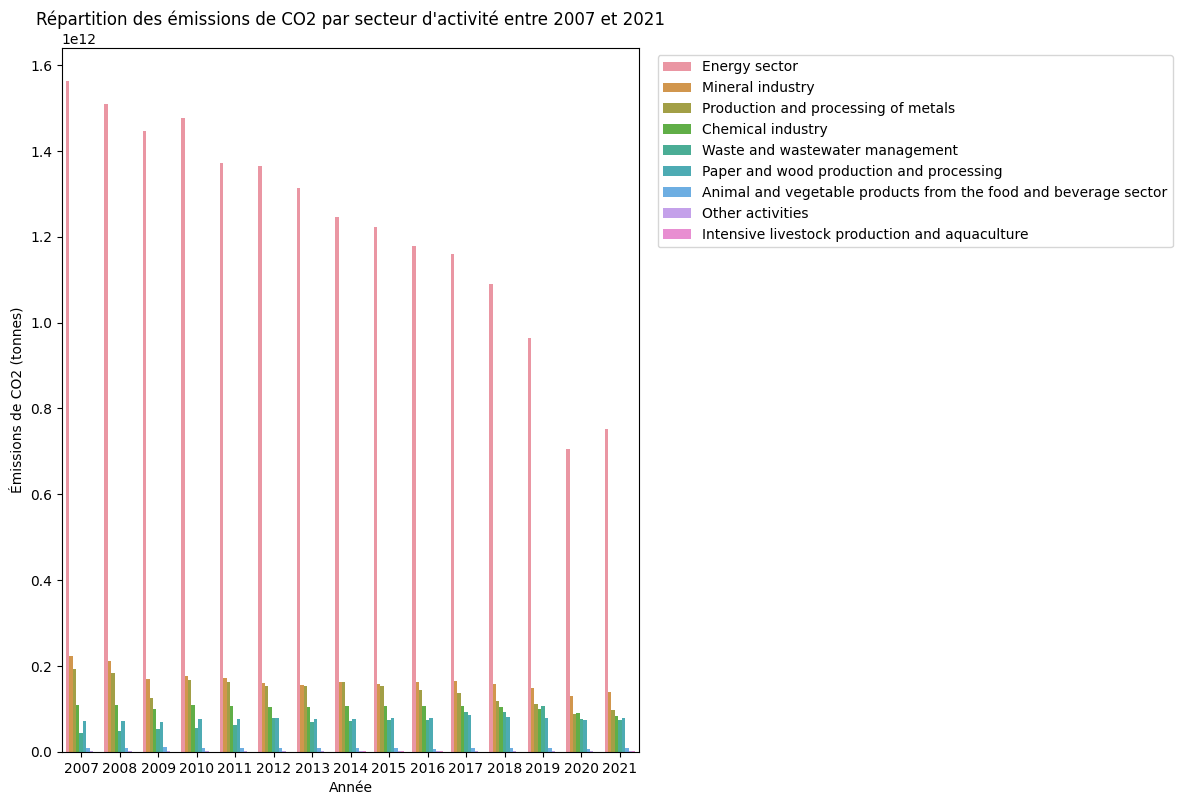

In [171]:
co2_data = co2_data.reset_index()

plt.figure(figsize=(12, 8))
sns.set_palette("viridis")

sns.barplot(data=co2_data, x="reportingYear", y="sum", hue="eprtrSectorName")
plt.xlabel("Année")
plt.ylabel("Émissions de CO2 (tonnes)")
plt.title("Répartition des émissions de CO2 par secteur d'activité entre 2007 et 2021")

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

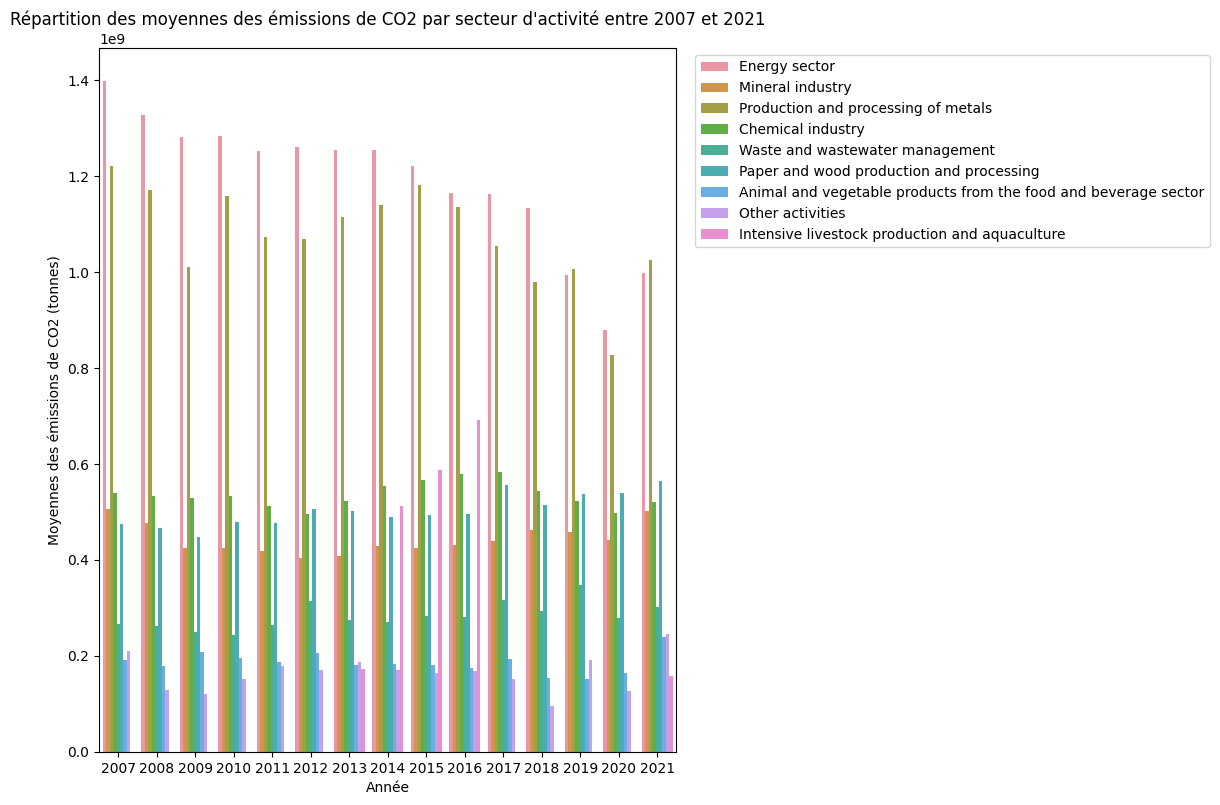

In [172]:
plt.figure(figsize=(12, 8))
sns.set_palette("viridis")

sns.barplot(data=co2_data, x="reportingYear", y="mean", hue="eprtrSectorName")
plt.xlabel("Année")
plt.ylabel("Moyennes des émissions de CO2 (tonnes)")
plt.title("Répartition des moyennes des émissions de CO2 par secteur d'activité entre 2007 et 2021")

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

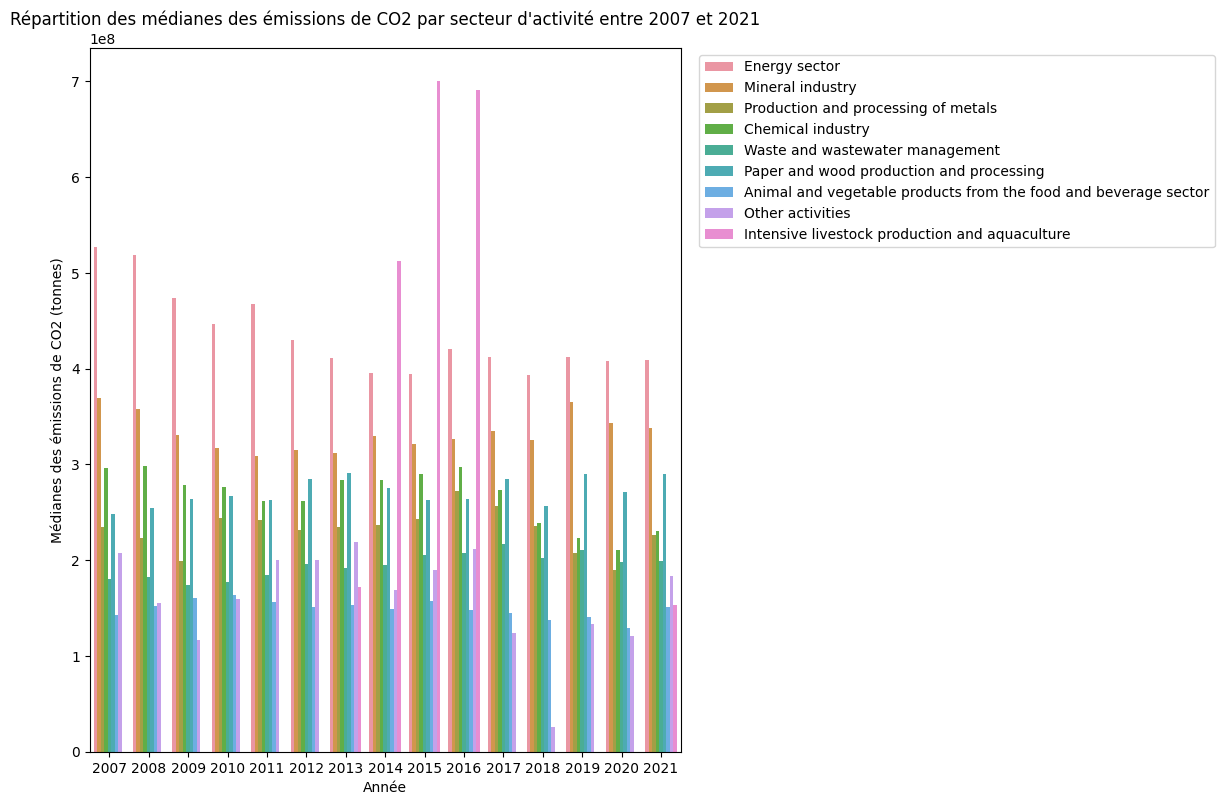

In [173]:
plt.figure(figsize=(12, 8))
sns.set_palette("viridis")

sns.barplot(data=co2_data, x="reportingYear", y="median", hue="eprtrSectorName")
plt.xlabel("Année")
plt.ylabel("Médianes des émissions de CO2 (tonnes)")
plt.title("Répartition des médianes des émissions de CO2 par secteur d'activité entre 2007 et 2021")

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

La médiane du secteur Intensive livestock production and aquaculture en ce qui concerne les émissions de CO2 est aussi élevée car il n'y a que 13 entrées basées sur ce polluant dans ce secteur.

In [175]:
emissions_of_pollutants_group_by_sector = emissions_of_pollutants_group_by_sector["emissions"].aggregate(
    ["count", "sum", "median", "mean"])
emissions_of_pollutants_group_by_sector

count   
eprtrSectorName                                    pollutant                              
Animal and vegetable products from the food and... Ammonia (NH3)                    365  \
                                                   Arsenic and compounds (as As)      5   
                                                   Benzene                           34   
                                                   CONFIDENTIAL                       1   
                                                   Cadmium and compounds (as Cd)     14   
...                                                                                 ...   
Waste and wastewater management                    Trichloroethylene (TRI)           13   
                                                   Trichloromethane                  25   
                                                   Vinyl chloride                    17   
                                                   Xylenes                            1   
                                                   Zinc and compounds (as Zn)       326   

                                                                                           sum   
eprtrSectorName                                    pollutant                                     
Animal and vegetable products from the food and... Ammonia (NH3)                  1.278604e+07  \
                                                   Arsenic and compounds (as As)  3.238000e+02   
                                                   Benzene                        5.705000e+04   
                                                   CONFIDENTIAL                   0.000000e+00   
                                                   Cadmium and compounds (as Cd)  4.104000e+02   
...                                                                                        ...   
Waste and wastewater management                    Trichloroethylene (TRI)        1.002520e+06   
                                                   Trichloromethane               3.172400e+04   
                                                   Vinyl chloride                 5.245960e+05   
                                                   Xylenes                        6.040000e+03   
                                                   Zinc and compounds (as Zn)     2.237487e+05   

                                                                                   median   
eprtrSectorName                                    pollutant                                
Animal and vegetable products from the food and... Ammonia (NH3)                  22500.0  \
                                                   Arsenic and compounds (as As)     31.6   
                                                   Benzene                         1545.0   
                                                   CONFIDENTIAL                       0.0   
                                                   Cadmium and compounds (as Cd)     21.3   
...                                                                                   ...   
Waste and wastewater management                    Trichloroethylene (TRI)        53000.0   
                                                   Trichloromethane                 800.0   
                                                   Vinyl chloride                 13600.0   
                                                   Xylenes                         6040.0   
                                                   Zinc and compounds (as Zn)       310.0   

                                                                                          mean  
eprtrSectorName                                    pollutant                                    
Animal and vegetable products from the food and... Ammonia (NH3)                  35030.258904  
                                                   Arsenic and compounds (as As)     64.760000  
                         

In [178]:
emissions_of_pollutants_group_by_sector = emissions_of_pollutants_group_by_sector[
    emissions_of_pollutants_group_by_sector.index.get_level_values("pollutant") != "CONFIDENTIAL"]

In [177]:
print("Nombre d'enregistrement total :", emissions_of_pollutants_group_by_sector["count"].sum())
print("Nombre de polluant total :", len(df.pollutant.unique()))

Nombre d'enregistrement total : 323540
Nombre de polluant total : 68


In [185]:
count_pollutant_over500 = emissions_of_pollutants_group_by_sector[emissions_of_pollutants_group_by_sector["count"] >= 500]
print("Nombre d'enregistrement restant :", count_pollutant_over500["count"].sum())
print("Nombre de polluant restant :", len(
    count_pollutant_over500\
    .groupby("pollutant")[["count", "sum"]]\
    .sum()\
    .sort_values(by=["count"])
))

Nombre d'enregistrement restant : 297390
Nombre de polluant restant : 26


In [186]:
emissions_of_pollutants_group_by_sector.groupby("eprtrSectorName")[["count", "sum"]].sum()

,count,sum
eprtrSectorName,,
Animal and vegetable products from the food and beverage sector,6676,1.405890e+11
Chemical industry,24130,1.761264e+12
Energy sector,80201,2.147779e+13
Intensive livestock production and aquaculture,93864,7.939479e+09
Mineral industry,35626,2.842982e+12
Other activities,5453,1.698520e+10
Paper and wood production and processing,13230,1.229096e+12
Production and processing of metals,27781,2.469400e+12
Waste and wastewater management,36164,1.205272e+12


In [187]:
count_pollutant_over500.groupby("eprtrSectorName")[["count", "sum"]].sum()

,count,sum
eprtrSectorName,,
Animal and vegetable products from the food and beverage sector,5128,1.267621e+11
Chemical industry,18986,1.550477e+12
Energy sector,78854,2.147779e+13
Intensive livestock production and aquaculture,93445,3.306541e+09
Mineral industry,31407,2.842483e+12
Other activities,3601,1.197908e+09
Paper and wood production and processing,10606,1.229075e+12
Production and processing of metals,22755,2.186251e+12
Waste and wastewater management,32608,1.204600e+12


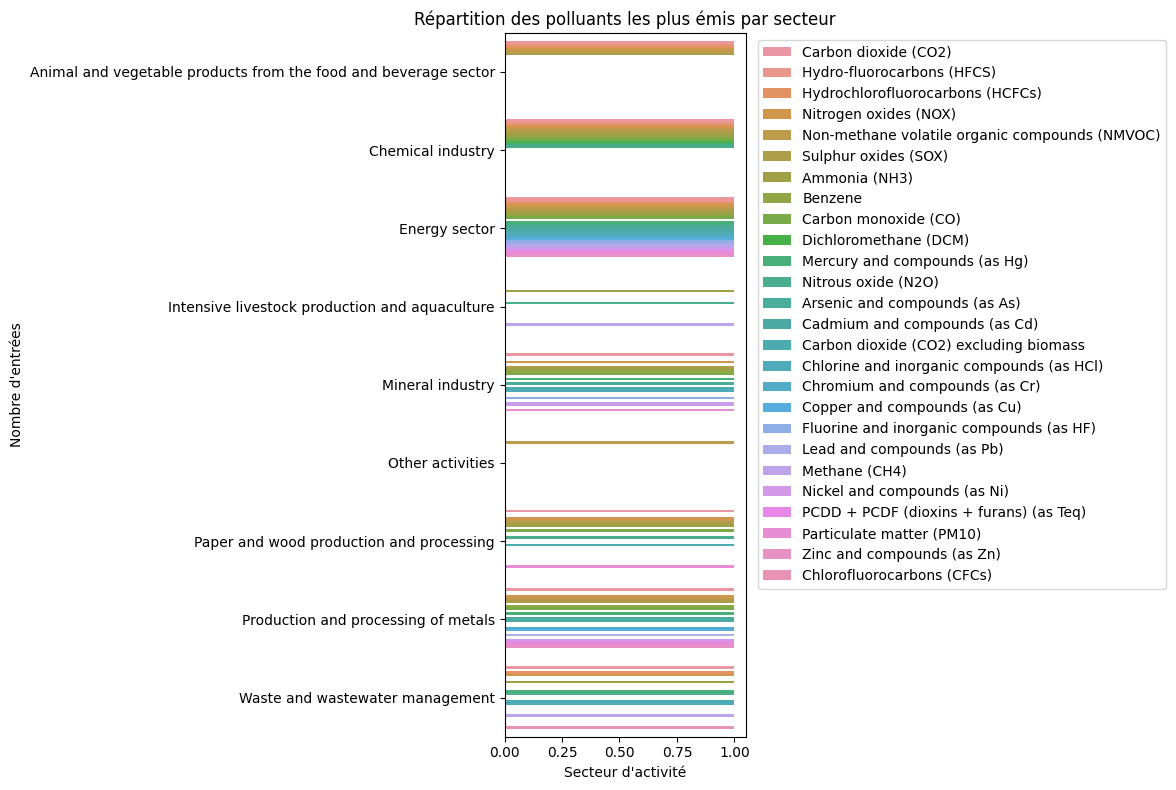

In [191]:
plt.figure(figsize=(12, 8))
sns.set_palette("viridis")

sns.countplot(
    data=count_pollutant_over500, 
    y=count_pollutant_over500.index.get_level_values("eprtrSectorName"), 
    hue=count_pollutant_over500.index.get_level_values("pollutant")
)
plt.xlabel("Nombre d'entrées")
plt.ylabel("Secteur d'activité")
plt.title("Répartition des polluants les plus émis par secteur")

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()